# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data 
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | kayangel
Processing Record 3 of Set 1 | nguti
Processing Record 4 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | peddapalli
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | narvik
Processing Record 13 of Set 1 | itaituba
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | tateyama
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | kamina
Processing Record 20 of Set 1 | wailua homesteads
Processing 

Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | arkhangel'sk
Processing Record 42 of Set 4 | belmonte
Processing Record 43 of Set 4 | paita
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | clinton
Processing Record 46 of Set 4 | sormiou
City not found. Skipping...
Processing Record 47 of Set 4 | terrace
Processing Record 48 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 49 of Set 4 | korsakov
Processing Record 0 of Set 5 | afaahiti
Processing Record 1 of Set 5 | coruche
Processing Record 2 of Set 5 | juye
Processing Record 3 of Set 5 | abeche
Processing Record 4 of Set 5 | manismata
Processing Record 5 of Set 5 | lauro de freitas
Processing Record 6 of Set 5 | giyani
Processing Record 7 of Set 5 | herceg novi
Processing Record 8 of Set 5 | ust-nera
Processing Record 9 of Set 5 | chonchi
Processing Record 10 of Set 5 | hadagalli
Processing Record 11 of Set 5 | enewetak
Processing Record 12 of Set 5 | al qar

Processing Record 29 of Set 8 | singkil
Processing Record 30 of Set 8 | la gi
Processing Record 31 of Set 8 | labytnangi
Processing Record 32 of Set 8 | segezha
Processing Record 33 of Set 8 | pandan
Processing Record 34 of Set 8 | maxixe
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | piti village
Processing Record 37 of Set 8 | rondonopolis
Processing Record 38 of Set 8 | alotau
City not found. Skipping...
Processing Record 39 of Set 8 | canacona
Processing Record 40 of Set 8 | yanykurgan
Processing Record 41 of Set 8 | al kharj
Processing Record 42 of Set 8 | luorong
Processing Record 43 of Set 8 | goth radhan
Processing Record 44 of Set 8 | bayanhongor
Processing Record 45 of Set 8 | albesti
Processing Record 46 of Set 8 | vilyuchinsk
Processing Record 47 of Set 8 | gamba
Processing Record 48 of Set 8 | amga
Processing Record 49 of Set 8 | toga village
City not found. Skipping...
Processing Record 0 of Set 9 | trincomalee
Processing Record 1 of Set 9 | leh
Pr

Processing Record 22 of Set 12 | benidorm
Processing Record 23 of Set 12 | burang
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | seaside
Processing Record 26 of Set 12 | lazaro cardenas
Processing Record 27 of Set 12 | ciudad lazaro cardenas
Processing Record 28 of Set 12 | sarandi grande
Processing Record 29 of Set 12 | magdagachi
Processing Record 30 of Set 12 | sargatskoye
Processing Record 31 of Set 12 | todos santos
Processing Record 32 of Set 12 | nadym
Processing Record 33 of Set 12 | ilha de mocambique
Processing Record 34 of Set 12 | isangel
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,15.23,89,38,2.38,PT,1706655260
1,kayangel,8.0823,134.7173,27.23,82,35,10.65,PW,1706655491
2,nguti,5.3299,9.4185,25.31,66,65,1.10,CM,1706655491
3,puerto ayora,-0.7393,-90.3518,28.98,80,85,4.52,EC,1706655492
4,peddapalli,18.6167,79.3667,18.97,57,11,1.25,IN,1706655492


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,15.23,89,38,2.38,PT,1706655260
1,kayangel,8.0823,134.7173,27.23,82,35,10.65,PW,1706655491
2,nguti,5.3299,9.4185,25.31,66,65,1.10,CM,1706655491
3,puerto ayora,-0.7393,-90.3518,28.98,80,85,4.52,EC,1706655492
4,peddapalli,18.6167,79.3667,18.97,57,11,1.25,IN,1706655492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

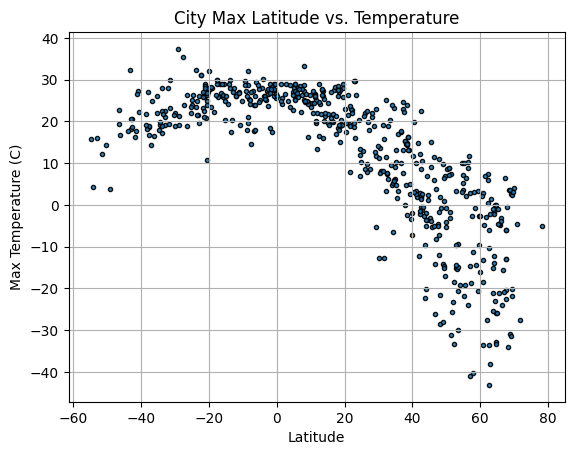

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker=".", 
    alpha=0.9,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

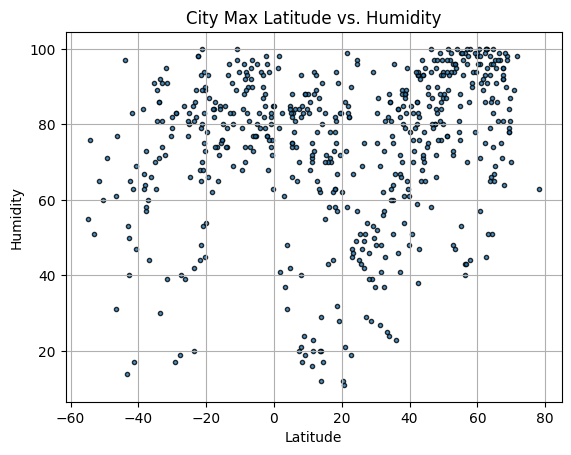

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker=".", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

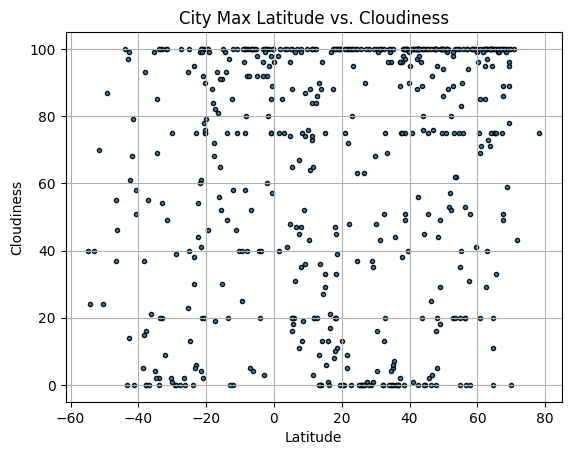

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker=".", 
    alpha=0.9,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

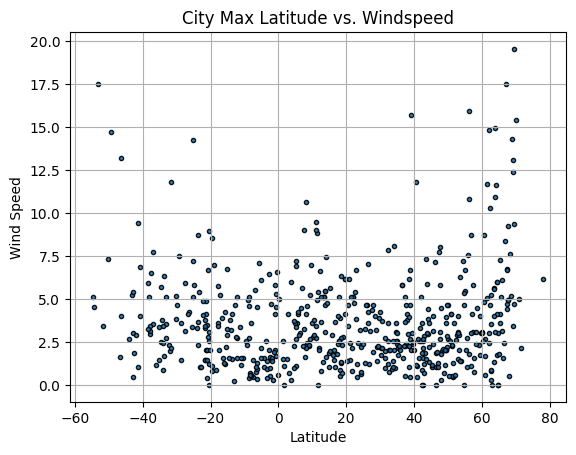

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker=".", 
    alpha=0.9,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


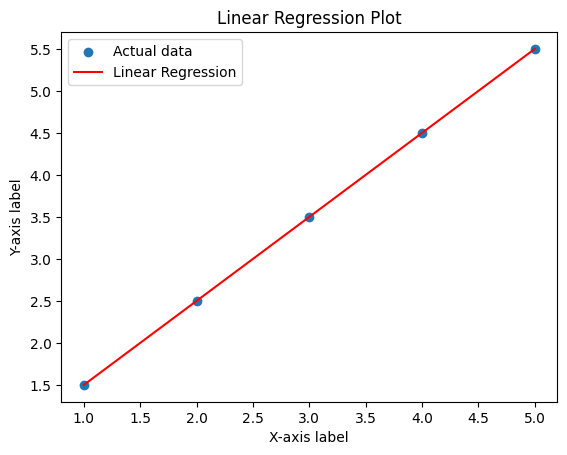

In [35]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Linear Regression Plot')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# Assuming x and y are your data points
x = [1, 2, 3, 4, 5]
y = [1.5, 2.5, 3.5, 4.5, 5.5]
create_linear_regression_plot(x, y)

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,15.23,89,38,2.38,PT,1706655260
1,kayangel,8.0823,134.7173,27.23,82,35,10.65,PW,1706655491
2,nguti,5.3299,9.4185,25.31,66,65,1.10,CM,1706655491
4,peddapalli,18.6167,79.3667,18.97,57,11,1.25,IN,1706655492
6,polyarnyy,69.1989,33.4478,2.63,79,96,12.37,RU,1706655492


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,28.98,80,85,4.52,EC,1706655492
5,edinburgh of the seven seas,-37.0676,-12.3116,14.28,60,55,3.55,SH,1706655492
7,grytviken,-54.2811,-36.5092,4.30,76,24,4.55,GS,1706655493
10,itaituba,-4.2761,-55.9836,28.09,83,40,1.03,BR,1706655493
11,port-aux-francais,-49.3500,70.2167,3.88,71,87,14.71,TF,1706655493


###  Temperature vs. Latitude Linear Regression Plot

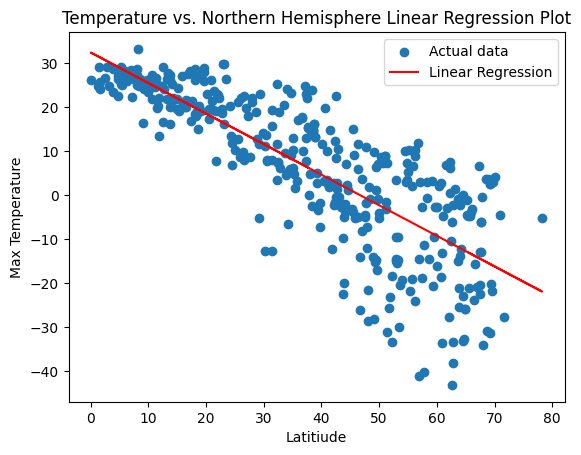

In [66]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('Max Temperature')
    plt.title('Temperature vs. Northern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

create_linear_regression_plot(x, y)

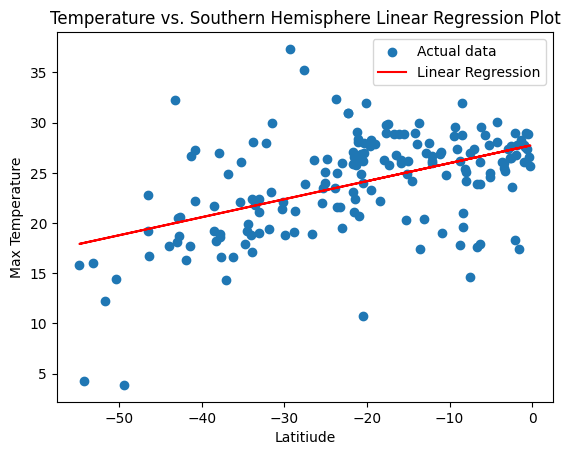

In [67]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('Max Temperature')
    plt.title('Temperature vs. Southern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** Temperature Is highest the closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

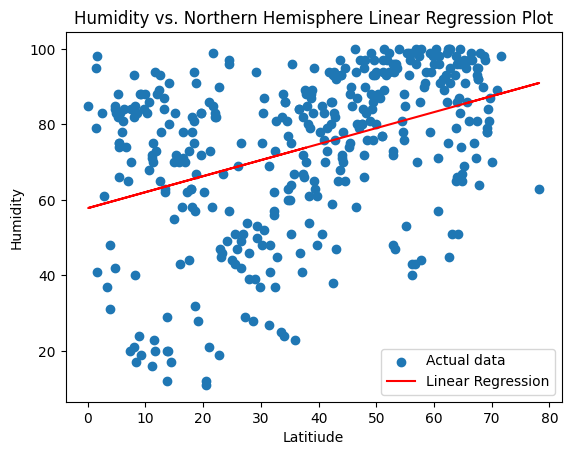

In [75]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('Humidity')
    plt.title('Humidity vs. Northern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

create_linear_regression_plot(x, y)

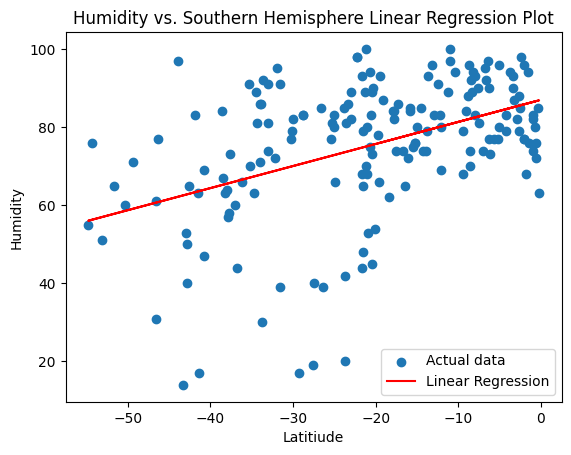

In [69]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('Humidity')
    plt.title('Humidity vs. Southern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** Humidity is higher and more concetrated in the northern hemisphere compared to the southern hemisphere


### Cloudiness vs. Latitude Linear Regression Plot

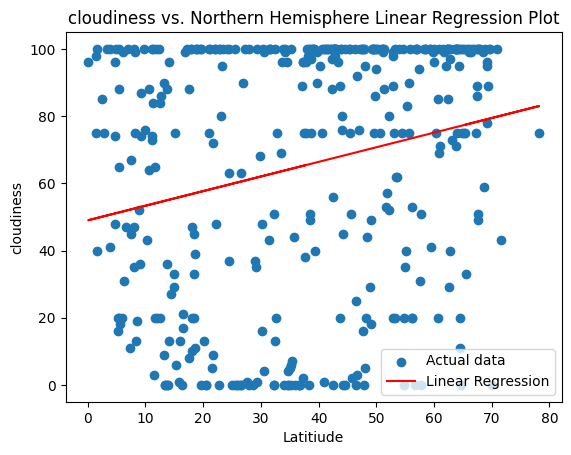

In [71]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('cloudiness')
    plt.title('cloudiness vs. Northern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

create_linear_regression_plot(x, y)

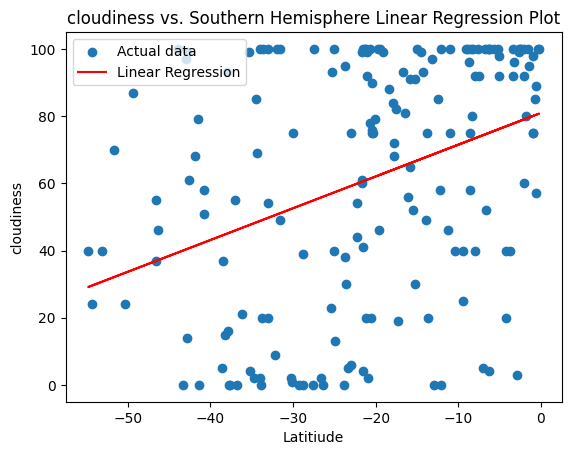

In [72]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('cloudiness')
    plt.title('cloudiness vs. Southern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** There does not seem to be a correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

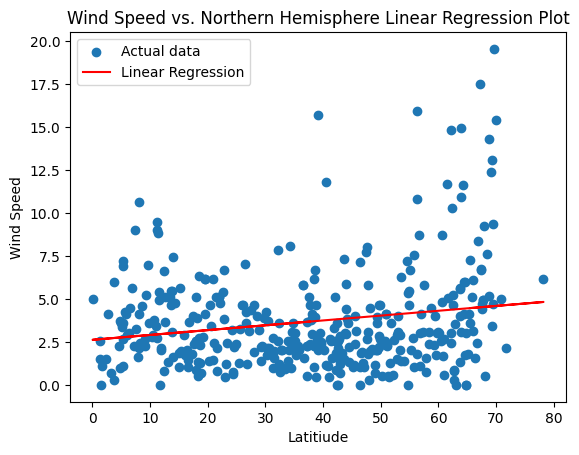

In [74]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('Wind Speed')
    plt.title('Wind Speed vs. Northern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

create_linear_regression_plot(x, y)

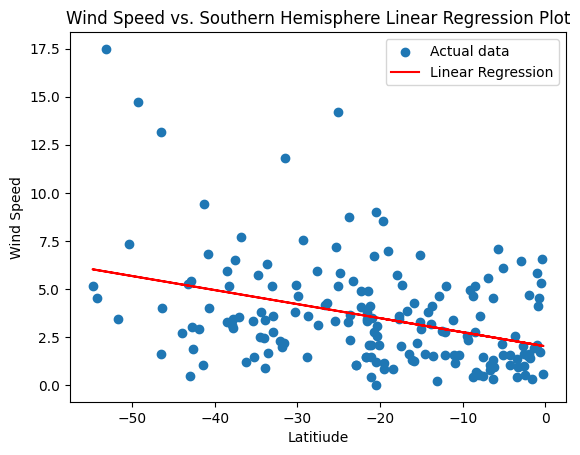

In [73]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

    # Plot the original data points
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line
    plt.plot(x, line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel('Latitiude')
    plt.ylabel('Wind Speed')
    plt.title('Wind Speed vs. Southern Hemisphere Linear Regression Plot')
    

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

create_linear_regression_plot(x, y)

**Discussion about the linear relationship:** Wind speed is at its highest at the poles of the earth